Train Images Shape: (60000, 28, 28)
Train Labels Length: 60000
Test Images Shape: (10000, 28, 28)
Test Labels Length: 10000


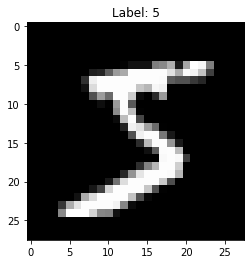

In [3]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Model
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras.layers import (Dense, Activation, Flatten, Dropout, Conv2D, Conv2DTranspose,
                                     MaxPooling2D, LeakyReLU, Input)
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from scikeras.wrappers import KerasRegressor, KerasClassifier
from tensorflow.keras.utils import to_categorical
import seaborn as sns
import pandas as pd
import numpy as np
import os

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import accuracy_score, classification_report

import matplotlib.pyplot as plt


# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

data = mnist.load_data

# Display information about the dataset
print("Train Images Shape:", x_train.shape)
print("Train Labels Length:", len(y_train))
print("Test Images Shape:", x_test.shape)
print("Test Labels Length:", len(y_test))

# Visualize a sample image
import matplotlib.pyplot as plt

plt.imshow(x_train[0], cmap='gray')
plt.title(f"Label: {y_train[0]}")
plt.show()

# Reshape and normalize the input data
x_train = x_train.reshape((x_train.shape[0], 28, 28, 1)).astype('float32') / 255
x_test = x_test.reshape((x_test.shape[0], 28, 28, 1)).astype('float32') / 255

y_train = to_categorical(y_train)
y_test= to_categorical(y_test)

seed_value = 42
tf.random.set_seed(seed_value)

In [54]:
def generate_noise(batch_size, noise_dim):
    return np.random.normal(0, 1, size=(batch_size, noise_dim)).astype(np.float32)

def create_gen(base, noise_dim, target_shape):
    gen = base
    
    gen.add(Dense(196, input_dim=noise_dim))
    #gen.add(layers.LeakyReLU())
    gen.add(Dense(784, activation = 'relu'))
    gen.add(Dense(1568, activation = 'sigmoid'))
    gen.add(layers.Reshape((7, 7, 32)))
    
    gen.add(Conv2DTranspose(128, kernel_size=1, strides = (1, 2), padding='same'))
    assert gen.output_shape == (None, 7, 14, 128), f'Model Shape {gen.output_shape}'
    
    gen.add(Conv2DTranspose(128, kernel_size=1, strides = (2, 1), padding='same'))
    assert gen.output_shape == (None, 14, 14, 128), f'Model Shape {gen.output_shape}'
    
    gen.add(Conv2DTranspose(128, kernel_size=3, strides = (2, 1), padding='same'))
    assert gen.output_shape == (None, 28, 14, 128), f'Model Shape {gen.output_shape}'
    gen.add(layers.BatchNormalization())

    gen.add(Conv2DTranspose(128, kernel_size=3, strides = (1, 2), padding='same'))
    assert gen.output_shape == (None, 28, 28, 128), f'Model Shape {gen.output_shape}'
    gen.add(layers.BatchNormalization())    
    
    gen.add(Conv2DTranspose(128, kernel_size=3, strides = (1, 1), padding='same'))
    assert gen.output_shape == (None, 28, 28, 128), f'Model Shape {gen.output_shape}'
    #gen.add(layers.BatchNormalization())

    gen.add(Conv2DTranspose(128, kernel_size=4, strides = 1, padding='same'))
    gen.add(layers.BatchNormalization())

    #gen.add(layers.Conv2DTranspose(1, (5, 5), strides=(1, 1), padding='same', use_bias=False, 
     #                                activation = 'tanh'))
    gen.add(layers.Conv2DTranspose(1, (5, 5), strides=(1, 1), padding='same', use_bias=False, 
                                     activation = 'sigmoid'))
    assert gen.output_shape == (None, 28, 28, 1), f'Model Shape {model.output_shape}'
    
    return gen

def create_disc(base, target_shape):
    discriminator = base
    discriminator.add(Conv2D(filters=64, kernel_size=(2, 2), padding='same', input_shape=target_shape, strides=(2,1)))
    discriminator.add(Dropout(rate=0.2))
    discriminator.add(MaxPooling2D(pool_size=(2, 1)))
    discriminator.add(Conv2D(filters=64, kernel_size=(2, 2), padding='same', strides=(1,2)))
    discriminator.add(MaxPooling2D(pool_size=(1, 2)))

    discriminator.add(Conv2D(filters=128, kernel_size=(2, 2), padding='same', strides=(1,1)))
    #discriminator.add(MaxPooling2D(pool_size=(1, 2)))
    
    discriminator.add(layers.Flatten())
    discriminator.add(layers.Dense(512))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(rate=0.2))
    discriminator.add(Dense(256))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dense(128))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dropout(rate=0.2))
    discriminator.add(Dense(64))
    discriminator.add(LeakyReLU(alpha=0.2))
    discriminator.add(Dense(1, activation='sigmoid'))
    
    return discriminator
    

def create_gan(gen, disc):
    disc.trainable = False
    
    return gan
    

In [56]:
batch_size= 128
noise_dim = 50
target_shape = (28, 28, 1)

seq = Sequential()
noise = generate_noise(batch_size, noise_dim)

gen = create_gen(seq, noise_dim, target_shape)
gen.compile(optimizer='adam', loss='binary_crossentropy')

disc = create_disc(seq, target_shape)
disc.compile(optimizer='adam', loss='binary_crossentropy')



In [59]:
gen.summary()
disc.summary()

Model: "sequential_26"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_79 (Dense)            (None, 196)               9996      
                                                                 
 dense_80 (Dense)            (None, 784)               154448    
                                                                 
 dense_81 (Dense)            (None, 1568)              1230880   
                                                                 
 reshape_18 (Reshape)        (None, 7, 7, 32)          0         
                                                                 
 conv2d_transpose_65 (Conv2  (None, 7, 14, 128)        4224      
 DTranspose)                                                     
                                                                 
 conv2d_transpose_66 (Conv2  (None, 14, 14, 128)       16512     
 DTranspose)                                         

 conv2d_6 (Conv2D)           (None, 14, 28, 64)        320       
                                                                 
 dropout_6 (Dropout)         (None, 14, 28, 64)        0         
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 7, 28, 64)         0         
 g2D)                                                            
                                                                 
 conv2d_7 (Conv2D)           (None, 7, 14, 64)         16448     
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 7, 7, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_8 (Conv2D)           (None, 7, 7, 128)         32896     
                                                                 
 flatten_2 (Flatten)         (None, 6272)              0         
          

In [62]:
# Disable training for the discriminator during GAN training
disc.trainable = False

# Connect the generator and discriminator
noise_input = Input(shape=(noise_dim,))
generated_image = gen(noise_input)
validity = disc(generated_image)

# Create the GAN model
gan = Model(noise_input, validity)

# Compile the GAN model
gan.compile(optimizer='adam', loss='binary_crossentropy')

ValueError: Exception encountered when calling layer "sequential_26" (type Sequential).

Input 0 of layer "dense_79" is incompatible with the layer: expected axis -1 of input shape to have value 50, but received input with shape (None, 1)

Call arguments received by layer "sequential_26" (type Sequential):
  • inputs=tf.Tensor(shape=(None, 1), dtype=float32)
  • training=None
  • mask=None